# **Chapter 3. Python 을 활용한 데이터 전처리** 





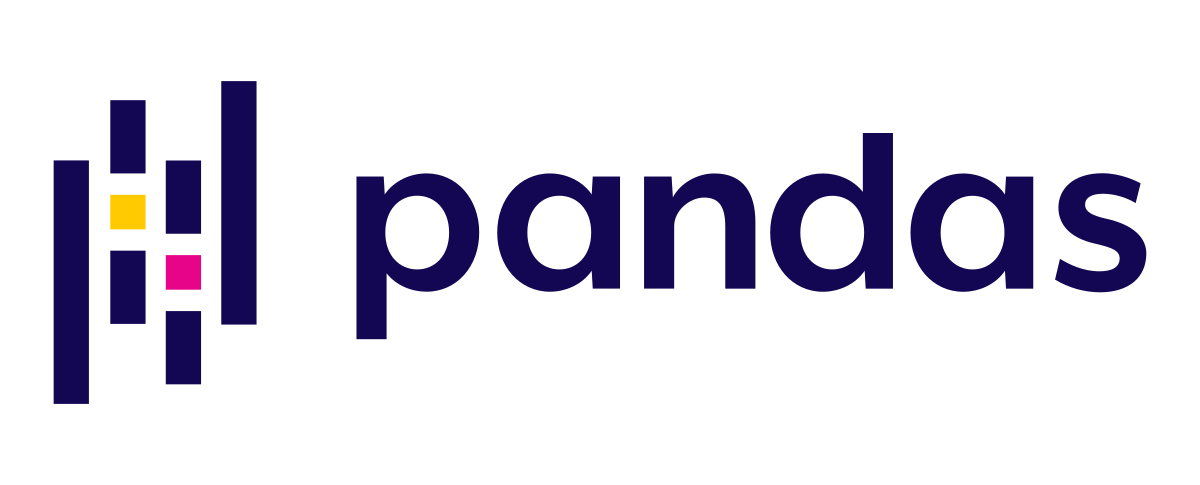


---
### **학습 목표**
> 3-4. Pandas 란? <br>
> 3-5. csv, excel 파일 읽고 쓰기, 요약 정보 한눈에 확인하기 <br>
> 3-6. 데이터 슬라이싱을 통해 Pandas 익숙해지기 <br>
> 3-7. 통계값 계산 및 정렬 방법 익히기 <br>
> 3-8. 피벗 테이블(pivot table) 기능과 그룹 통계(groupby) <br>
> 3-9. 데이터 합치기 (Join 과 Merge, Concat) <br>
> 3-10. 자료형 변환, 산술 연산 <br>
> 3-11. 전처리의 기본! 결측값, 중복 처리 <br>
> **3-12. 고급 기능 (apply, lambda, map) 으로 나도 이제 Pandas 고수!** <br>
> 3-13. Pandas 시각화로 멋지게 레포팅하자 <br>
> 3-14. 실습 예제 <br>

## 3-12. apply, lambda, map 함수

In [1]:
# 라이브러리 임포트
import pandas as pd
import numpy as np

In [2]:
# 실습 파일 로딩 (아이돌 프로필)
# df = pd.read_csv('https://bit.ly/3gRXTfD')
df = pd.read_csv('kpop_idols.csv')
df

Profile Stage Name        Full Name Korean Name K. Stage Name  \
0     Profile    Taeyeon      Kim Taeyeon         김태연            태연   
1         NaN      Sunny       Lee Sunkyu         이순규            써니   
2         NaN    Tiffany    Hwang Miyoung         황미영           티파니   
3         NaN    Hyoyeon      Kim Hyoyeon         김효연            효연   
4         NaN       Yuri        Kwon Yuri         권유리            유리   
...       ...        ...              ...         ...           ...   
1589      NaN     Ririka   Kishida Ririka     키시다 리리카           리리카   
1590      NaN       Nayu        Kim Yewon         김예원            나유   
1591      NaN       Elva      Lee Yonghwa         이용화            엘바   
1592      NaN       Lily  Lily Jin Morrow    릴리 진 머로우            릴리   
1593      NaN     Haewon        Oh Haewon         오해원            해원   

     Date of Birth  Group      Country Second Country  Height  Weight  \
0       1989-03-09   SNSD  South Korea            NaN     160      44   
1       1989-05-15   SNSD  South Korea            NaN     158      43   
2       1989-08-01   SNSD  South Korea            USA     163      50   
3       1989-09-22   SNSD  South Korea            NaN     158      48   
4       1989-12-05   SNSD  South Korea            NaN     167      45   
...            ...    ...          ...            ...     ...     ...   
1589    2002-07-02  ILY:1        Japan            NaN     162       0   
1590    2002-07-23  ILY:1  South Korea            NaN       0       0   
1591    2003-05-05  ILY:1  South Korea            NaN       0       0   
1592    2002-10-17  NMIXX    Australia    South Korea       0       0   
1593    2003-02-25  NMIXX  South Korea            NaN       0       0   

         Birthplace Other Group Former Group Gender               Position  \
0            Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
1        California         NaN          NaN      F                    NaN   
2     San Francisco         TTS          NaN      F                    NaN   
3           Incheon         NaN          NaN      F                    NaN   
4            Goyang         NaN          NaN      F                    NaN   
...             ...         ...          ...    ...                    ...   
1589            NaN         NaN          NaN      F                    NaN   
1590            NaN         NaN          NaN      F                    NaN   
1591            NaN         NaN          NaN      F                    NaN   
1592     Marysville         NaN          NaN      F                    NaN   
1593            NaN         NaN          NaN      F                    NaN   

         Instagram Twitter  
0       taeyeon_ss     NaN  
1       svnnynight     NaN  
2     xolovestephi     NaN  
3      watasiwahyo     NaN  
4          yulyulk     NaN  
...            ...     ...  
1589           NaN     NaN  
1590           NaN     NaN  
1591           NaN     NaN  
1592           NaN     NaN  
1593           NaN     NaN  

[1594 rows x 18 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1594 entries, 0 to 1593
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Profile         412 non-null    object
 1   Stage Name      1594 non-null   object
 2   Full Name       1587 non-null   object
 3   Korean Name     1586 non-null   object
 4   K. Stage Name   1593 non-null   object
 5   Date of Birth   1593 non-null   object
 6   Group           1465 non-null   object
 7   Country         1594 non-null   object
 8   Second Country  54 non-null     object
 9   Height          1594 non-null   int64 
 10  Weight          1594 non-null   int64 
 11  Birthplace      737 non-null    object
 12  Other Group     136 non-null    object
 13  Former Group    231 non-null    object
 14  Gender          1594 non-null   object
 15  Position        77 non-null     object
 16  Instagram       156 non-null    object
 17  Twitter         12 non-null     object
dtypes: int64

In [4]:
df.loc[df['Gender']=='M'][:3]

Profile Stage Name       Full Name Korean Name K. Stage Name  \
247     NaN      T.O.P  Choi Seunghyun         최승현             탑   
248     NaN    Taeyang   Dong Youngbae         동영배            태양   
249     NaN   G-Dragon     Kwon Jiyong         권지용          지드래곤   

    Date of Birth    Group      Country Second Country  Height  Weight  \
247    1987-11-04  BIGBANG  South Korea            NaN     180      65   
248    1988-05-18  BIGBANG  South Korea            NaN     174      56   
249    1988-08-18  BIGBANG  South Korea            NaN     177      58   

    Birthplace Other Group Former Group Gender Position Instagram Twitter  
247      Seoul      GD&TOP          NaN      M      NaN       NaN     NaN  
248  Uljeongbu         NaN          NaN      M      NaN       NaN     NaN  
249      Seoul      GD&TOP          NaN      M      NaN       NaN     NaN

In [5]:
# 'Gender'가 'M'인 상위 3개 행에
# 원본 데이터프레임 상위 9개 행 결합
# df = df.loc[df['Gender']=='M'][:3].append(df.head(9)).reset_index(drop=True)  -> 1.4이하
df = pd.concat([df.loc[df['Gender']=='M'][:3], df.head(9)]).reset_index(drop=True)
df

Profile Stage Name       Full Name Korean Name K. Stage Name  \
0       NaN      T.O.P  Choi Seunghyun         최승현             탑   
1       NaN    Taeyang   Dong Youngbae         동영배            태양   
2       NaN   G-Dragon     Kwon Jiyong         권지용          지드래곤   
3   Profile    Taeyeon     Kim Taeyeon         김태연            태연   
4       NaN      Sunny      Lee Sunkyu         이순규            써니   
5       NaN    Tiffany   Hwang Miyoung         황미영           티파니   
6       NaN    Hyoyeon     Kim Hyoyeon         김효연            효연   
7       NaN       Yuri       Kwon Yuri         권유리            유리   
8       NaN   Sooyoung   Choi Sooyoung         최수영            수영   
9       NaN      Yoona        Im Yoona         임윤아            윤아   
10      NaN    Seohyun     Seo Joohyun         서주현            서현   
11      NaN    Jessica    Jessica Jung       제시카 정           제시카   

   Date of Birth    Group      Country Second Country  Height  Weight  \
0     1987-11-04  BIGBANG  South Korea            NaN     180      65   
1     1988-05-18  BIGBANG  South Korea            NaN     174      56   
2     1988-08-18  BIGBANG  South Korea            NaN     177      58   
3     1989-03-09     SNSD  South Korea            NaN     160      44   
4     1989-05-15     SNSD  South Korea            NaN     158      43   
5     1989-08-01     SNSD  South Korea            USA     163      50   
6     1989-09-22     SNSD  South Korea            NaN     158      48   
7     1989-12-05     SNSD  South Korea            NaN     167      45   
8     1990-02-10     SNSD  South Korea            NaN     170      48   
9     1990-05-30     SNSD  South Korea            NaN     166      47   
10    1991-06-28     SNSD  South Korea            NaN     168      48   
11    1989-04-18      NaN  South Korea            NaN       0       0   

       Birthplace Other Group Former Group Gender               Position  \
0           Seoul      GD&TOP          NaN      M                    NaN   
1       Uljeongbu         NaN          NaN      M                    NaN   
2           Seoul      GD&TOP          NaN      M                    NaN   
3          Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
4      California         NaN          NaN      F                    NaN   
5   San Francisco         TTS          NaN      F                    NaN   
6         Incheon         NaN          NaN      F                    NaN   
7          Goyang         NaN          NaN      F                    NaN   
8         Gwangju         NaN          NaN      F                    NaN   
9           Seoul         NaN          NaN      F                    NaN   
10          Seoul         TTS          NaN      F                    NaN   
11            NaN         NaN         SNSD      F                    NaN   

       Instagram Twitter  
0            NaN     NaN  
1            NaN     NaN  
2            NaN     NaN  
3     taeyeon_ss     NaN  
4     svnnynight     NaN  
5   xolovestephi     NaN  
6    watasiwahyo     NaN  
7        yulyulk     NaN  
8     hotsootuff     NaN  
9     yoona__lim     NaN  
10   seojuhyun_s     NaN  
11   jessica.syj     NaN

In [6]:
df = df[['Height', 'Weight', 'Gender']]
df

Height  Weight Gender
0      180      65      M
1      174      56      M
2      177      58      M
3      160      44      F
4      158      43      F
5      163      50      F
6      158      48      F
7      167      45      F
8      170      48      F
9      166      47      F
10     168      48      F
11       0       0      F

> ###  **3-12-1. apply 함수**


> - apply 함수는 데이터에 **구체적인 로직을 적용** 하고 싶을 경우 사용합니다.
> - **로직이 정의된 함수를 만들고**, **`apply()` 함수에 대입**합니다.


In [6]:
df['Height'][3:11].mean()

163.75

In [8]:
def replace_zero(x):
    if x==0:
        # x=165   # 값이 0일 경우 원하는 값으로 대체
        x = df['Height'][3:11
        ].mean()
    return x

In [9]:
df['Height']= df['Height'].apply(replace_zero)

In [10]:
df

Profile Stage Name       Full Name Korean Name K. Stage Name  \
0       NaN      T.O.P  Choi Seunghyun         최승현             탑   
1       NaN    Taeyang   Dong Youngbae         동영배            태양   
2       NaN   G-Dragon     Kwon Jiyong         권지용          지드래곤   
3   Profile    Taeyeon     Kim Taeyeon         김태연            태연   
4       NaN      Sunny      Lee Sunkyu         이순규            써니   
5       NaN    Tiffany   Hwang Miyoung         황미영           티파니   
6       NaN    Hyoyeon     Kim Hyoyeon         김효연            효연   
7       NaN       Yuri       Kwon Yuri         권유리            유리   
8       NaN   Sooyoung   Choi Sooyoung         최수영            수영   
9       NaN      Yoona        Im Yoona         임윤아            윤아   
10      NaN    Seohyun     Seo Joohyun         서주현            서현   
11      NaN    Jessica    Jessica Jung       제시카 정           제시카   

   Date of Birth    Group      Country Second Country  Height  Weight  \
0     1987-11-04  BIGBANG  South Korea            NaN  180.00      65   
1     1988-05-18  BIGBANG  South Korea            NaN  174.00      56   
2     1988-08-18  BIGBANG  South Korea            NaN  177.00      58   
3     1989-03-09     SNSD  South Korea            NaN  160.00      44   
4     1989-05-15     SNSD  South Korea            NaN  158.00      43   
5     1989-08-01     SNSD  South Korea            USA  163.00      50   
6     1989-09-22     SNSD  South Korea            NaN  158.00      48   
7     1989-12-05     SNSD  South Korea            NaN  167.00      45   
8     1990-02-10     SNSD  South Korea            NaN  170.00      48   
9     1990-05-30     SNSD  South Korea            NaN  166.00      47   
10    1991-06-28     SNSD  South Korea            NaN  168.00      48   
11    1989-04-18      NaN  South Korea            NaN  163.75       0   

       Birthplace Other Group Former Group Gender               Position  \
0           Seoul      GD&TOP          NaN      M                    NaN   
1       Uljeongbu         NaN          NaN      M                    NaN   
2           Seoul      GD&TOP          NaN      M                    NaN   
3          Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
4      California         NaN          NaN      F                    NaN   
5   San Francisco         TTS          NaN      F                    NaN   
6         Incheon         NaN          NaN      F                    NaN   
7          Goyang         NaN          NaN      F                    NaN   
8         Gwangju         NaN          NaN      F                    NaN   
9           Seoul         NaN          NaN      F                    NaN   
10          Seoul         TTS          NaN      F                    NaN   
11            NaN         NaN         SNSD      F                    NaN   

       Instagram Twitter  
0            NaN     NaN  
1            NaN     NaN  
2            NaN     NaN  
3     taeyeon_ss     NaN  
4     svnnynight     NaN  
5   xolovestephi     NaN  
6    watasiwahyo     NaN  
7        yulyulk     NaN  
8     hotsootuff     NaN  
9     yoona__lim     NaN  
10   seojuhyun_s     NaN  
11   jessica.syj     NaN

> ###  **3-12-2. lambda 함수**


> - lambda 함수는 apply 에서 **`def` 정의된 함수와 동일한 기능**을 합니다.
> - 다만, **한줄로 간편하게 작성**할 수 있기 때문에 `def 함수명`, `return` 등 복잡하게 작성하지 않아도 됩니다.
> - 로직이 복잡하지 않을 경우 (사칙연산, 간단한 문자열 추출 등), 자주 사용하는 함수입니다.
> - 기본 사용법  
    - **`lambda '입력변수': '리턴값' '조건문(옵션)'`**


In [11]:
# 값이 0일 경우 원하는 값으로 대체
# df['Weight']= df['Weight'].apply(lambda x: 50 if x==0 else x)
df['Weight']= df['Weight'].apply(lambda x: df['Weight'][3:11].mean() if x==0 else x)

In [12]:
df

Profile Stage Name       Full Name Korean Name K. Stage Name  \
0       NaN      T.O.P  Choi Seunghyun         최승현             탑   
1       NaN    Taeyang   Dong Youngbae         동영배            태양   
2       NaN   G-Dragon     Kwon Jiyong         권지용          지드래곤   
3   Profile    Taeyeon     Kim Taeyeon         김태연            태연   
4       NaN      Sunny      Lee Sunkyu         이순규            써니   
5       NaN    Tiffany   Hwang Miyoung         황미영           티파니   
6       NaN    Hyoyeon     Kim Hyoyeon         김효연            효연   
7       NaN       Yuri       Kwon Yuri         권유리            유리   
8       NaN   Sooyoung   Choi Sooyoung         최수영            수영   
9       NaN      Yoona        Im Yoona         임윤아            윤아   
10      NaN    Seohyun     Seo Joohyun         서주현            서현   
11      NaN    Jessica    Jessica Jung       제시카 정           제시카   

   Date of Birth    Group      Country Second Country  Height  Weight  \
0     1987-11-04  BIGBANG  South Korea            NaN  180.00  65.000   
1     1988-05-18  BIGBANG  South Korea            NaN  174.00  56.000   
2     1988-08-18  BIGBANG  South Korea            NaN  177.00  58.000   
3     1989-03-09     SNSD  South Korea            NaN  160.00  44.000   
4     1989-05-15     SNSD  South Korea            NaN  158.00  43.000   
5     1989-08-01     SNSD  South Korea            USA  163.00  50.000   
6     1989-09-22     SNSD  South Korea            NaN  158.00  48.000   
7     1989-12-05     SNSD  South Korea            NaN  167.00  45.000   
8     1990-02-10     SNSD  South Korea            NaN  170.00  48.000   
9     1990-05-30     SNSD  South Korea            NaN  166.00  47.000   
10    1991-06-28     SNSD  South Korea            NaN  168.00  48.000   
11    1989-04-18      NaN  South Korea            NaN  163.75  46.625   

       Birthplace Other Group Former Group Gender               Position  \
0           Seoul      GD&TOP          NaN      M                    NaN   
1       Uljeongbu         NaN          NaN      M                    NaN   
2           Seoul      GD&TOP          NaN      M                    NaN   
3          Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
4      California         NaN          NaN      F                    NaN   
5   San Francisco         TTS          NaN      F                    NaN   
6         Incheon         NaN          NaN      F                    NaN   
7          Goyang         NaN          NaN      F                    NaN   
8         Gwangju         NaN          NaN      F                    NaN   
9           Seoul         NaN          NaN      F                    NaN   
10          Seoul         TTS          NaN      F                    NaN   
11            NaN         NaN         SNSD      F                    NaN   

       Instagram Twitter  
0            NaN     NaN  
1            NaN     NaN  
2            NaN     NaN  
3     taeyeon_ss     NaN  
4     svnnynight     NaN  
5   xolovestephi     NaN  
6    watasiwahyo     NaN  
7        yulyulk     NaN  
8     hotsootuff     NaN  
9     yoona__lim     NaN  
10   seojuhyun_s     NaN  
11   jessica.syj     NaN

In [13]:
# 집계된 컬럼 만들기
# df['Weight/Height'] = df['Weight'] / df['Height']
# axis 0 : 행방향으로 동작(위에서 아래로), axis 1 : 열방항으로 동작(왼쪽에서 오른쪽으로)
df['Weight/Height'] = df.apply(lambda x: x['Weight']/x['Height'], axis=1)

In [14]:
df

Profile Stage Name       Full Name Korean Name K. Stage Name  \
0       NaN      T.O.P  Choi Seunghyun         최승현             탑   
1       NaN    Taeyang   Dong Youngbae         동영배            태양   
2       NaN   G-Dragon     Kwon Jiyong         권지용          지드래곤   
3   Profile    Taeyeon     Kim Taeyeon         김태연            태연   
4       NaN      Sunny      Lee Sunkyu         이순규            써니   
5       NaN    Tiffany   Hwang Miyoung         황미영           티파니   
6       NaN    Hyoyeon     Kim Hyoyeon         김효연            효연   
7       NaN       Yuri       Kwon Yuri         권유리            유리   
8       NaN   Sooyoung   Choi Sooyoung         최수영            수영   
9       NaN      Yoona        Im Yoona         임윤아            윤아   
10      NaN    Seohyun     Seo Joohyun         서주현            서현   
11      NaN    Jessica    Jessica Jung       제시카 정           제시카   

   Date of Birth    Group      Country Second Country  Height  Weight  \
0     1987-11-04  BIGBANG  South Korea            NaN  180.00  65.000   
1     1988-05-18  BIGBANG  South Korea            NaN  174.00  56.000   
2     1988-08-18  BIGBANG  South Korea            NaN  177.00  58.000   
3     1989-03-09     SNSD  South Korea            NaN  160.00  44.000   
4     1989-05-15     SNSD  South Korea            NaN  158.00  43.000   
5     1989-08-01     SNSD  South Korea            USA  163.00  50.000   
6     1989-09-22     SNSD  South Korea            NaN  158.00  48.000   
7     1989-12-05     SNSD  South Korea            NaN  167.00  45.000   
8     1990-02-10     SNSD  South Korea            NaN  170.00  48.000   
9     1990-05-30     SNSD  South Korea            NaN  166.00  47.000   
10    1991-06-28     SNSD  South Korea            NaN  168.00  48.000   
11    1989-04-18      NaN  South Korea            NaN  163.75  46.625   

       Birthplace Other Group Former Group Gender               Position  \
0           Seoul      GD&TOP          NaN      M                    NaN   
1       Uljeongbu         NaN          NaN      M                    NaN   
2           Seoul      GD&TOP          NaN      M                    NaN   
3          Jeonju  TTS, Oh!GG          NaN      F  Leader, Main Vocalist   
4      California         NaN          NaN      F                    NaN   
5   San Francisco         TTS          NaN      F                    NaN   
6         Incheon         NaN          NaN      F                    NaN   
7          Goyang         NaN          NaN      F                    NaN   
8         Gwangju         NaN          NaN      F                    NaN   
9           Seoul         NaN          NaN      F                    NaN   
10          Seoul         TTS          NaN      F                    NaN   
11            NaN         NaN         SNSD      F                    NaN   

       Instagram Twitter  Weight/Height  
0            NaN     NaN       0.361111  
1            NaN     NaN       0.321839  
2            NaN     NaN       0.327684  
3     taeyeon_ss     NaN       0.275000  
4     svnnynight     NaN       0.272152  
5   xolovestephi     NaN       0.306748  
6    watasiwahyo     NaN       0.303797  
7        yulyulk     NaN       0.269461  
8     hotsootuff     NaN       0.282353  
9     yoona__lim     NaN       0.283133  
10   seojuhyun_s     NaN       0.285714  
11   jessica.syj     NaN       0.284733

> ###  **3-12-3. map 함수**


> - 데이터 값을 **특정한 값으로 매핑(mapping) 하고 싶은 경우** 사용합니다. 
> - 반복문을 작성하면서 값을 치환하는 방법보다 효율적인 방법입니다.
> - **(주의!) 하나의 컬럼인, Series 형으로만 적용할 수 있습니다.**
> - 기본 사용법
    - **`df['컬럼명'].map('매핑 정보')`**


In [15]:
map_info = {'M' : '남자', 
            'F' : '여자'}

In [16]:
df['Gender'] = df['Gender'].map(map_info)

In [17]:
df

Profile Stage Name       Full Name Korean Name K. Stage Name  \
0       NaN      T.O.P  Choi Seunghyun         최승현             탑   
1       NaN    Taeyang   Dong Youngbae         동영배            태양   
2       NaN   G-Dragon     Kwon Jiyong         권지용          지드래곤   
3   Profile    Taeyeon     Kim Taeyeon         김태연            태연   
4       NaN      Sunny      Lee Sunkyu         이순규            써니   
5       NaN    Tiffany   Hwang Miyoung         황미영           티파니   
6       NaN    Hyoyeon     Kim Hyoyeon         김효연            효연   
7       NaN       Yuri       Kwon Yuri         권유리            유리   
8       NaN   Sooyoung   Choi Sooyoung         최수영            수영   
9       NaN      Yoona        Im Yoona         임윤아            윤아   
10      NaN    Seohyun     Seo Joohyun         서주현            서현   
11      NaN    Jessica    Jessica Jung       제시카 정           제시카   

   Date of Birth    Group      Country Second Country  Height  Weight  \
0     1987-11-04  BIGBANG  South Korea            NaN  180.00  65.000   
1     1988-05-18  BIGBANG  South Korea            NaN  174.00  56.000   
2     1988-08-18  BIGBANG  South Korea            NaN  177.00  58.000   
3     1989-03-09     SNSD  South Korea            NaN  160.00  44.000   
4     1989-05-15     SNSD  South Korea            NaN  158.00  43.000   
5     1989-08-01     SNSD  South Korea            USA  163.00  50.000   
6     1989-09-22     SNSD  South Korea            NaN  158.00  48.000   
7     1989-12-05     SNSD  South Korea            NaN  167.00  45.000   
8     1990-02-10     SNSD  South Korea            NaN  170.00  48.000   
9     1990-05-30     SNSD  South Korea            NaN  166.00  47.000   
10    1991-06-28     SNSD  South Korea            NaN  168.00  48.000   
11    1989-04-18      NaN  South Korea            NaN  163.75  46.625   

       Birthplace Other Group Former Group Gender               Position  \
0           Seoul      GD&TOP          NaN     남자                    NaN   
1       Uljeongbu         NaN          NaN     남자                    NaN   
2           Seoul      GD&TOP          NaN     남자                    NaN   
3          Jeonju  TTS, Oh!GG          NaN     여자  Leader, Main Vocalist   
4      California         NaN          NaN     여자                    NaN   
5   San Francisco         TTS          NaN     여자                    NaN   
6         Incheon         NaN          NaN     여자                    NaN   
7          Goyang         NaN          NaN     여자                    NaN   
8         Gwangju         NaN          NaN     여자                    NaN   
9           Seoul         NaN          NaN     여자                    NaN   
10          Seoul         TTS          NaN     여자                    NaN   
11            NaN         NaN         SNSD     여자                    NaN   

       Instagram Twitter  Weight/Height  
0            NaN     NaN       0.361111  
1            NaN     NaN       0.321839  
2            NaN     NaN       0.327684  
3     taeyeon_ss     NaN       0.275000  
4     svnnynight     NaN       0.272152  
5   xolovestephi     NaN       0.306748  
6    watasiwahyo     NaN       0.303797  
7        yulyulk     NaN       0.269461  
8     hotsootuff     NaN       0.282353  
9     yoona__lim     NaN       0.283133  
10   seojuhyun_s     NaN       0.285714  
11   jessica.syj     NaN       0.284733